##### Import Libraries

In [52]:
import tensorflow as tf
from keras import activations
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

##### Load Data & Normalize it

In [53]:
mnist = tf.keras.datasets.mnist

(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

xTrain, xTest = xTrain/255, xTest/255

In [54]:
xShape = xTrain[0].shape[0]
xShape

28

9


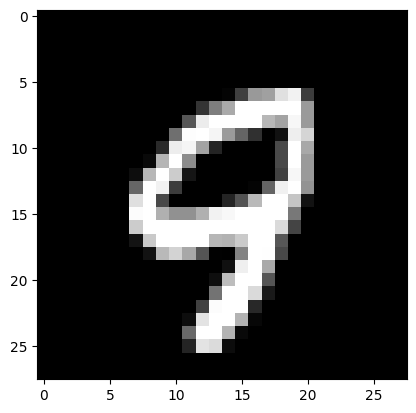

In [55]:
index = 42069
print(yTrain[index])
plt.imshow(xTrain[index], cmap = plt.cm.binary_r)
plt.show()

##### Create DNN Model

In [56]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (xShape, xShape)))

##### Add Hiddel Layers

In [57]:
model.add(tf.keras.layers.Dense(128, activation = activations.relu))
model.add(tf.keras.layers.Dense(128, activation = activations.relu))

##### Add Output Layer

In [58]:
model.add(tf.keras.layers.Dense(10, activation = activations.softmax))

##### Compile DNN Model

In [59]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['Accuracy'])

##### Train the DNN

In [60]:
model.fit(xTrain, yTrain, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2322 - Accuracy: 0.9314
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0988 - Accuracy: 0.9705
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0678 - Accuracy: 0.9788


In [61]:
validLoss, validAcc = model.evaluate(xTest, yTest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0893 - Accuracy: 0.9715


In [63]:
prediction = model.predict(xTest)

313/313 [==============================] - 0s 1ms/step


Predicted = 1 || Actual = 1
Correct


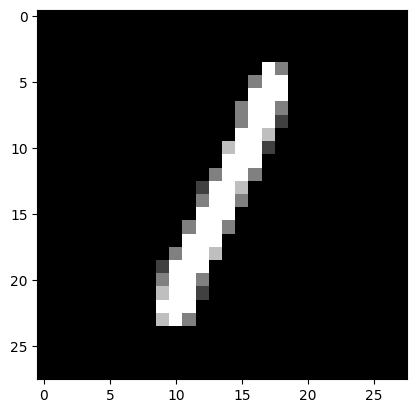

In [87]:
inx = 6969
print("Predicted =", np.argmax(prediction[inx]), "|| Actual =", yTest[inx])
print("Correct" if np.argmax(prediction[inx]) == yTest[inx] else "Wrong")

plt.imshow(xTest[inx], cmap = plt.cm.binary_r)
plt.show()

In [89]:
model.save("imageModel.keras")

In [91]:
imgModel = tf.keras.models.load_model("imageModel.keras")

In [92]:
nPred = imgModel.predict(xTest)

313/313 [==============================] - 0s 1ms/step


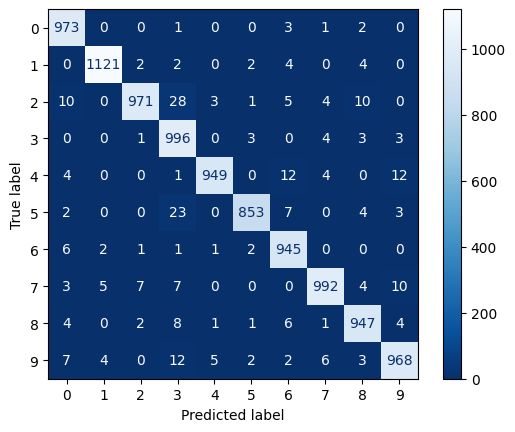

In [93]:
predLabels = np.argmax(prediction, axis=1)
cm = confusion_matrix(yTest, predLabels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues_r)